In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np

In [2]:
iris =sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: xlabel='sepal_length', ylabel='count'>

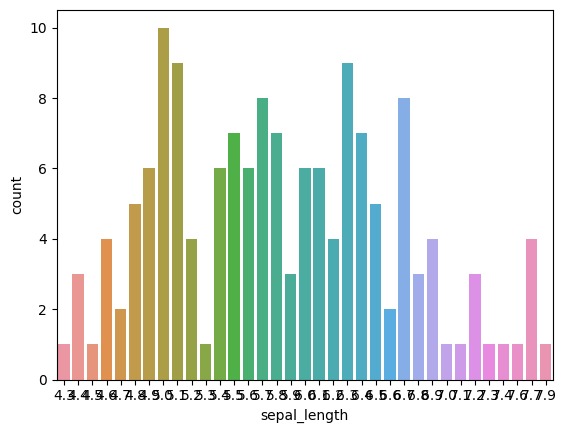

In [8]:
sns.countplot(data=iris,x='sepal_length')

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

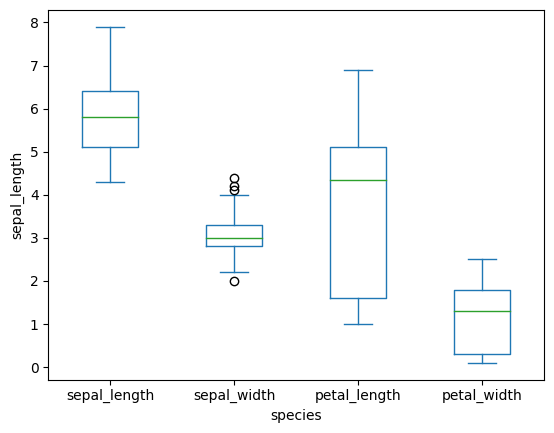

In [9]:
iris.plot(kind='box',xlabel='species',ylabel='sepal_length')

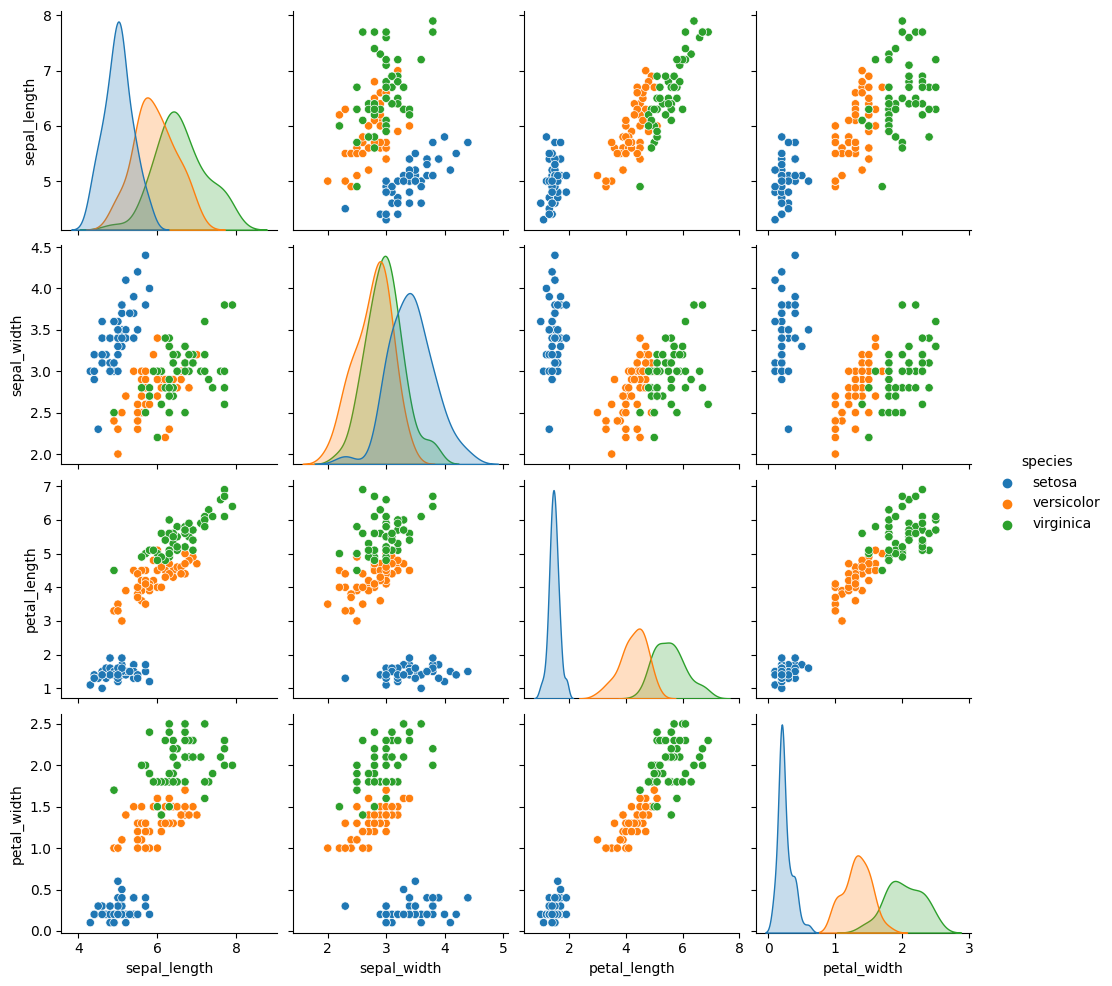

In [10]:
sns.pairplot(data=iris,hue='species')

In [11]:
target =iris['species']
df1 = iris.drop('species',axis=1)

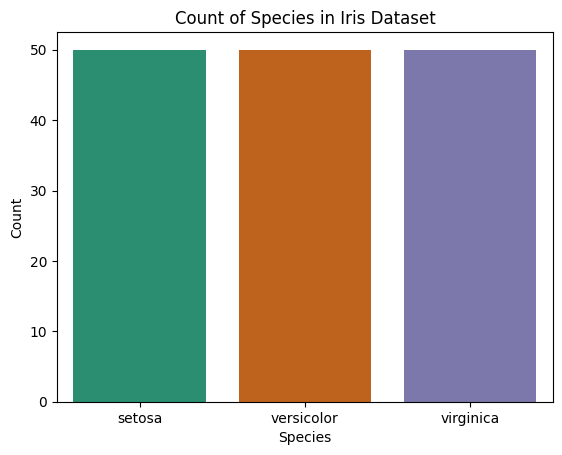

In [61]:
sns.countplot(iris,x = 'species',palette="Dark2")
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species in Iris Dataset')
plt.show()

In [12]:
df1.columns
X=df1

In [13]:
target.dtypes

dtype('O')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE = LabelEncoder()
target =LE.fit_transform(target)

In [17]:
y=target

In [38]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
prediction = Dtree.predict(X_test)
prediction

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [23]:
print("classification report"+classification_report(y_test,prediction))

classification report              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [49]:
conf = confusion_matrix(y_test,prediction)
conf

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

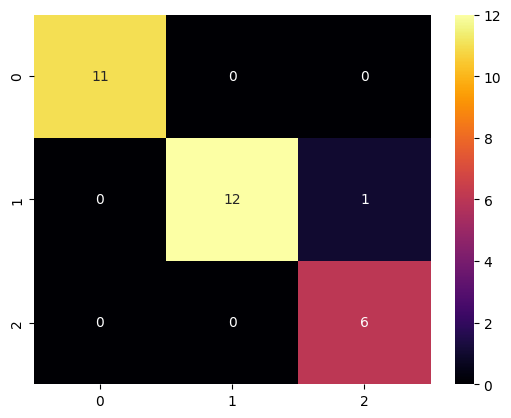

In [55]:
sns.heatmap(conf,annot = True, cmap='inferno')
plt.show()

In [24]:
acc = accuracy_score(y_test,prediction)
acc

0.9666666666666667

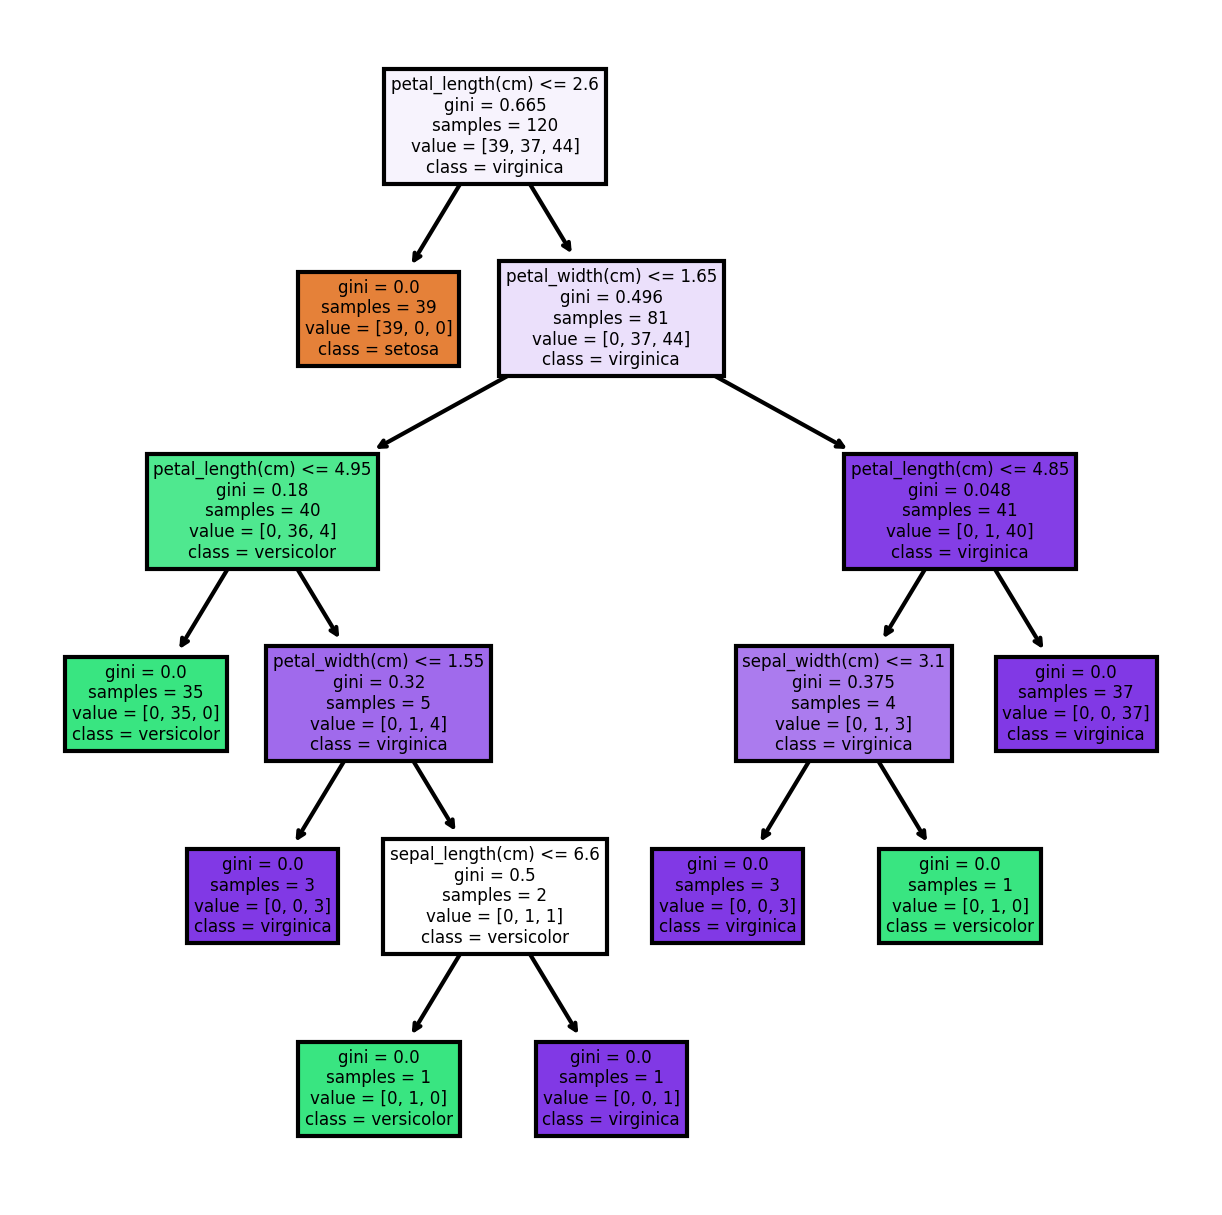

In [25]:
from sklearn import tree
fn =['sepal_length(cm)', 'sepal_width(cm)','petal_length(cm)','petal_width(cm)']
cn =['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows =1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(Dtree,
               feature_names=fn,
               class_names=cn,
               filled = True);
fig.savefig('Dtree.png')